In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input

/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.0,0.000000,0.000000,0.031320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.212281,9.740131,0.778914,0.000567,0.437802,0.000000,0.0,0.017135,5,0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003250,0.000000,...,0.306302,0.863947,0.000000,0.163189,0.480308,0.000000,0.0,0.040006,7,2
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008194,0.000000,...,5.486946,0.185759,0.000000,0.000000,0.647380,0.000000,0.0,0.056136,2,0
3,0.0,0.000000,0.000000,0.014783,0.279106,0.372164,0.013371,0.268368,0.182579,0.345025,...,0.503785,0.734408,0.000000,0.340287,1.789199,1.087958,0.0,0.156626,1,2
4,0.0,0.160487,0.025638,0.000000,0.000000,0.622140,0.257601,0.316833,0.719050,0.029470,...,0.720765,1.077659,0.000000,0.005505,0.372740,0.206353,0.0,0.002327,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.0,0.000000,0.000000,73.198198,50.675676,59.684685,58.558559,56.306306,58.558559,59.684685,...,95.720721,51.801802,47.297297,49.549550,49.549550,49.549550,0.0,0.000000,7,2
2668,0.0,0.000000,0.000000,27.329193,24.223602,27.329193,30.434783,27.329193,26.708075,27.329193,...,26.086957,26.708075,27.329193,27.329193,26.708075,27.329193,0.0,0.000000,8,2
2669,0.0,0.000000,0.000000,33.284024,36.242604,36.982249,39.940828,46.597633,53.254438,53.254438,...,32.544379,32.544379,32.544379,34.023669,31.804734,32.544379,0.0,0.000000,1,0
2670,0.0,0.293873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138923,0.019223,...,6.737973,2.665315,0.329958,0.568295,0.715051,0.095161,0.0,0.516790,2,2


In [3]:
# Split dataset in train, val and test
num_col = len(df.columns)
#train_split = 900
#test_split = 1050
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,:num_col-2]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data = np.array(test_data)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
test_data = test_data.reshape(len(test_data), 64,32, 1)
test_data = test_data / 500
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

print(test_subject.shape[1])

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, 0:num_col-2]
    val_data = df.iloc[train_split:test_split, 0:num_col-2]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data = df.iloc[test_split:,:num_col-2]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data = np.array(test_data)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_data = test_data.reshape(len(test_data), 64,32, 1)
    test_data = test_data / 500
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)
    
    print(test_subject.shape[1])


13


In [4]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

train_data = train_data.reshape(len(train_data), 64,32, 1)
val_data = val_data.reshape(len(val_data), 64,32, 1)

print(train_data.shape)
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 64, 32, 1)
(2400, 1)
(2400, 1)
(200, 64, 32, 1)
(200, 1)
(200, 1)


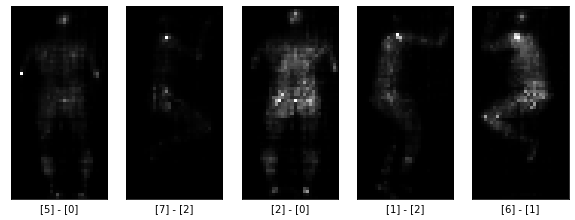

In [5]:
plt.figure(figsize=(10,5))
i = 0

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(train_subject[i-1]) + ' - ' + str(train_position[i-1])
    plt.imshow(train_data[i-1].reshape((64, 32)), cmap='gray')
    plt.xlabel(label)
    

In [6]:
# normalize data and build categorical labels
train_data = train_data / 500
val_data = val_data / 500

train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [7]:
inp = Input((64, 32, 1),)

x = Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 32, 1))(inp)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)
    
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

p = Flatten()(x)
p = Dense(120, activation='relu')(p)
p = Dense(84, activation='relu')(p)

p = Dropout(0.4)(p)

position = Dense(3, activation='softmax')(p)

s = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
s = MaxPooling2D((2, 2))(s)
s = Dropout(0.4)(s)

s = Flatten()(s)
s = Dense(120, activation='relu')(s)
s = Dense(84, activation='relu')(s)

s = Dropout(0.4)(s)

subject = Dense(13, activation='softmax')(s)

model_subject = Model(inp, subject)
model_position = Model(inp, position)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_subject.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_subject.summary()
model_position.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 7, 16)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 7, 16)         0     

In [9]:
#train subject model
history = History()

train_subject = model_subject.fit(train_data, train_subject, validation_data = (val_data, val_subject), epochs=200,batch_size = 8, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 2.5470 - acc: 0.0913 - val_loss: 2.5121 - val_acc: 0.1150
Epoch 2/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 2.4631 - acc: 0.1488 - val_loss: 2.3204 - val_acc: 0.2850
Epoch 3/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 2.3315 - acc: 0.1863 - val_loss: 2.1822 - val_acc: 0.3150
Epoch 4/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 2.1191 - acc: 0.2658 - val_loss: 1.8368 - val_acc: 0.4250
Epoch 5/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 1.9420 - acc: 0.3350 - val_loss: 1.5767 - val_acc: 0.5600
Epoch 6/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 1.7187 - acc: 0.4250 - val_loss: 1.3235 - val_acc: 0.6200
Epoch 7/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 1.5777 - acc: 0.4496 - val_loss: 1.1275 - val_acc: 0

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4504 - acc: 0.8517 - val_loss: 0.3413 - val_acc: 0.8800
Epoch 61/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4224 - acc: 0.8504 - val_loss: 0.3731 - val_acc: 0.8650
Epoch 62/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4538 - acc: 0.8521 - val_loss: 0.3474 - val_acc: 0.8750
Epoch 63/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4563 - acc: 0.8475 - val_loss: 0.3084 - val_acc: 0.9100
Epoch 64/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4258 - acc: 0.8554 - val_loss: 0.3357 - val_acc: 0.8850
Epoch 65/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4065 - acc: 0.8558 - val_loss: 0.3127 - val_acc: 0.8750
Epoch 66/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4183 - acc: 0.8575 - val_loss: 0.3024 - val_acc: 0.8650
Epoch 67/200
2400/2400 [=======================

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3183 - acc: 0.8875 - val_loss: 0.2855 - val_acc: 0.8950
Epoch 120/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3503 - acc: 0.8788 - val_loss: 0.2661 - val_acc: 0.8900
Epoch 121/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3326 - acc: 0.8788 - val_loss: 0.3073 - val_acc: 0.8950
Epoch 122/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3443 - acc: 0.8850 - val_loss: 0.3135 - val_acc: 0.8900
Epoch 123/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3256 - acc: 0.8833 - val_loss: 0.3105 - val_acc: 0.8750
Epoch 124/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3054 - acc: 0.8996 - val_loss: 0.2967 - val_acc: 0.8800
Epoch 125/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3037 - acc: 0.8929 - val_loss: 0.2845 - val_acc: 0.8750
Epoch 126/200
2400/2400 [================

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2856 - acc: 0.8992 - val_loss: 0.2592 - val_acc: 0.8950
Epoch 179/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2852 - acc: 0.9029 - val_loss: 0.2663 - val_acc: 0.8850
Epoch 180/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2880 - acc: 0.8992 - val_loss: 0.2759 - val_acc: 0.8900
Epoch 181/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2881 - acc: 0.9004 - val_loss: 0.2700 - val_acc: 0.8850
Epoch 182/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3243 - acc: 0.8942 - val_loss: 0.2673 - val_acc: 0.8800
Epoch 183/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2993 - acc: 0.8971 - val_loss: 0.3168 - val_acc: 0.8700
Epoch 184/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2833 - acc: 0.9021 - val_loss: 0.3141 - val_acc: 0.8750
Epoch 185/200
2400/2400 [================

Text(0, 0.5, 'Accuracy')

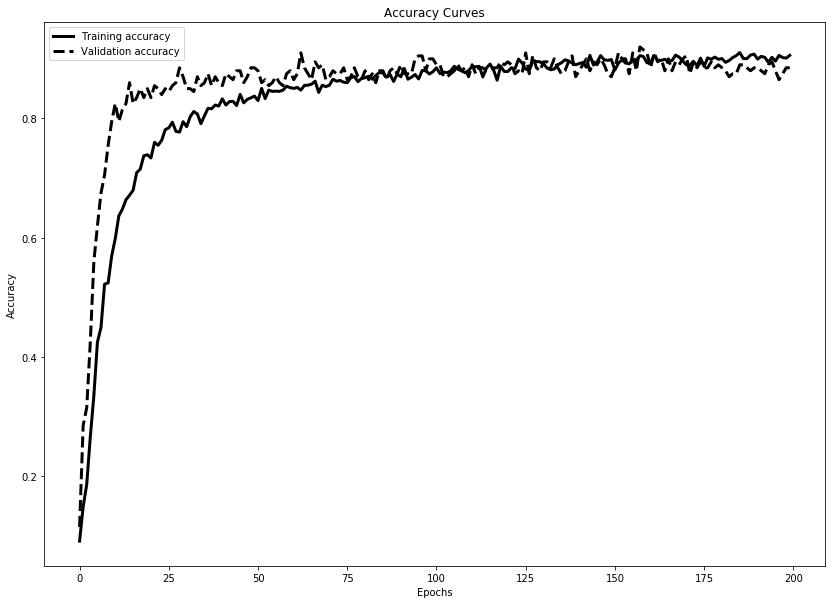

In [10]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [11]:
#train position model
history = History()

train_position = model_position.fit(train_data, train_position, validation_data = (val_data, val_position), epochs=10, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.2851 - acc: 0.8950 - val_loss: 0.0720 - val_acc: 0.9700
Epoch 2/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0670 - acc: 0.9754 - val_loss: 0.0632 - val_acc: 0.9850
Epoch 3/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0451 - acc: 0.9812 - val_loss: 0.0501 - val_acc: 0.9900
Epoch 4/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0353 - acc: 0.9883 - val_loss: 0.0410 - val_acc: 0.9950
Epoch 5/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0183 - acc: 0.9937 - val_loss: 0.0390 - val_acc: 0.9950
Epoch 6/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0223 - acc: 0.9942 - val_loss: 0.0540 - val_acc: 0.9850
Epoch 7/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0160 - acc: 0.9942 - val_loss: 0.0909 - val_acc: 0.9750
E

Text(0, 0.5, 'Accuracy')

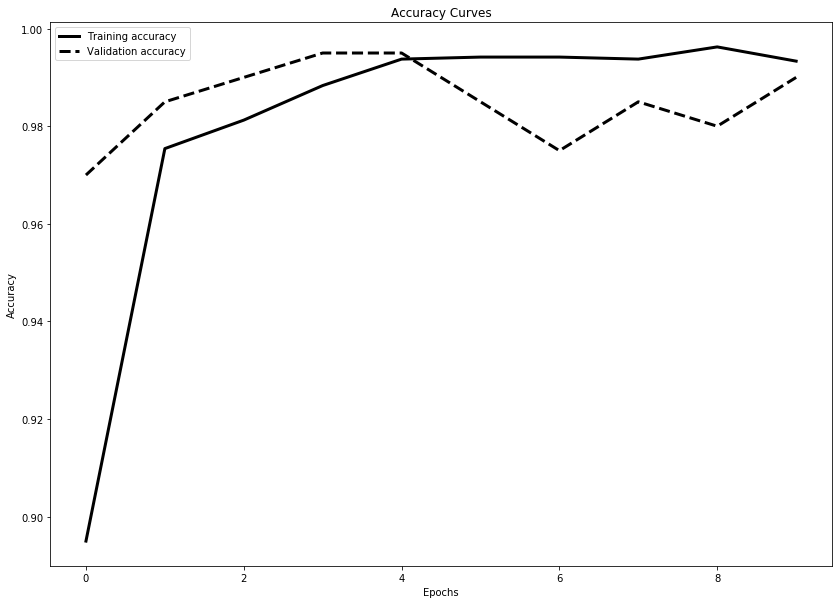

In [12]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [13]:
model_subject.evaluate(test_data, test_subject)
model_position.evaluate(test_data, test_position)


72/72 [==============================] - 0s 438us/sample - loss: 0.0693 - acc: 0.9722


[0.0692866743904435, 0.9722222]

,Subject,Position
2600,12,0
2601,10,1
2602,10,0
2603,4,0
2604,4,0
2605,5,2
2606,9,1
2607,8,1
2608,12,2
2609,10,1


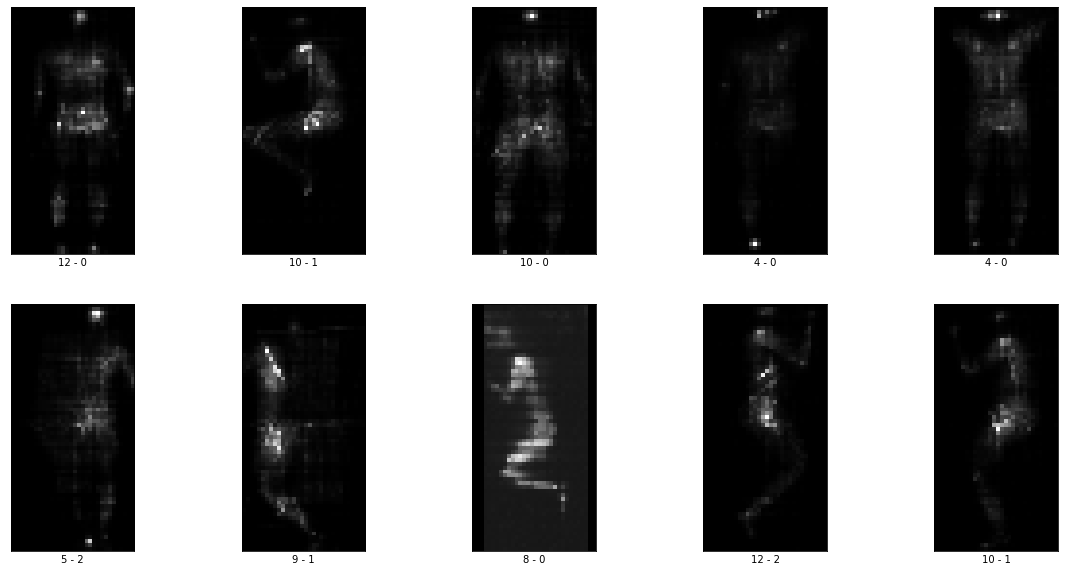

In [14]:
predictions_subject = model_subject.predict(test_data)
predictions_position = model_position.predict(test_data)

predictions_subject = predictions_subject.argmax(axis=-1)
predictions_position = predictions_position.argmax(axis=-1)

plt.figure(figsize=(20,10))

for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(predictions_subject[i-1]) + ' - ' + str(predictions_position[i-1])
    plt.imshow(test_data[i-1].reshape(64, 32), cmap='gray')
    plt.xlabel(label)

test_labels = df.iloc[test_split:, num_col-2:num_col]
test_labels.head(10)


In [15]:
import pickle
#save model and architecture to single file
model_subject.save("model_subject.h5")
model_position.save("model_position.h5")

with open('test.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([test_data, test_subject, test_position], f)